In [1]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import skimage
from skimage.metrics import structural_similarity as compare_ssim
from skimage.metrics import peak_signal_noise_ratio as compare_psnr

In [3]:
paired_dic_path = "../paired/"
left_dic_path = "../novel_left/"
right_dic_path = "../novel_right/"

gt_paired_file = "../gt/paired.png"
gt_left_file = "../gt/novel_left.png"
gt_right_file = "../gt/novel_right.png"

UPDATA=True

INDEX = np.arange(0.5, 4.6, 0.1)
COLUMNS = np.arange(0.1, 5.1, 0.1)
print(INDEX, COLUMNS)

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.
 4.1 4.2 4.3 4.4 4.5] [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [4]:
def image_evaluation(target_image_path, gt_image_path):
    target_img = cv2.imread(target_image_path)
    gt_img = cv2.imread(gt_image_path)
    
    psnr = compare_psnr(target_img, gt_img)
    ssim = compare_ssim(target_img, gt_img, data_range=255, channel_axis=2)
    return psnr, ssim

In [6]:
psnr_paired_list = []
ssim_paired_list = []

for _i in INDEX:
    for _c in COLUMNS:
        image_name = "%.1f_%.1f.png" % (_i, _c)
        
        _paired_file = paired_dic_path + image_name
        _left_file = left_dic_path + image_name
        _right_file = right_dic_path + image_name
        
        psnr_paired, ssim_paired = image_evaluation(_paired_file, gt_paired_file)
        
        psnr_paired_list.append(psnr_paired)
        ssim_paired_list.append(ssim_paired)

In [8]:
df_psnr_paired = pd.DataFrame(np.array(psnr_paired_list).reshape(41, 50))
df_ssim_paired = pd.DataFrame(np.array(ssim_paired_list).reshape(41, 50))

df_psnr_paired.to_csv('df_psnr_paired.csv')
df_ssim_paired.to_csv('df_ssim_paired.csv')


In [14]:
def plot_df(df):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
    
    y = INDEX
    x = COLUMNS
    X, Y = np.meshgrid(x, y)
    Z = df.values
    
    surf = ax.plot_surface(Y, X, Z, cmap=cm.coolwarm, linewidth=2, antialiased=False)
    
    ax.zaxis.set_major_locator(LinearLocator(50))
    ax.zaxis.set_major_formatter('{x:.02f}')
    
    fig.colorbar(surf, shrink=0.4, aspect=50)
    
    plt.show()

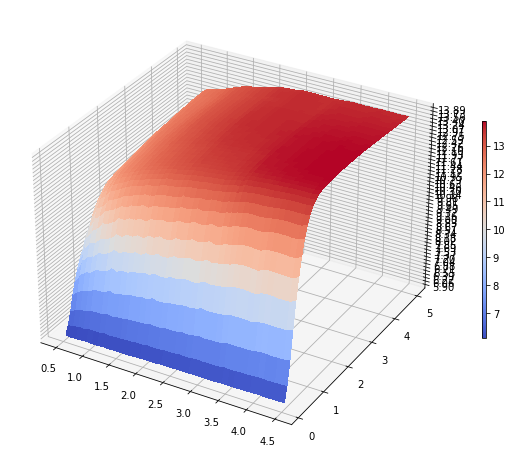

In [15]:
plot_df(df_psnr_paired)

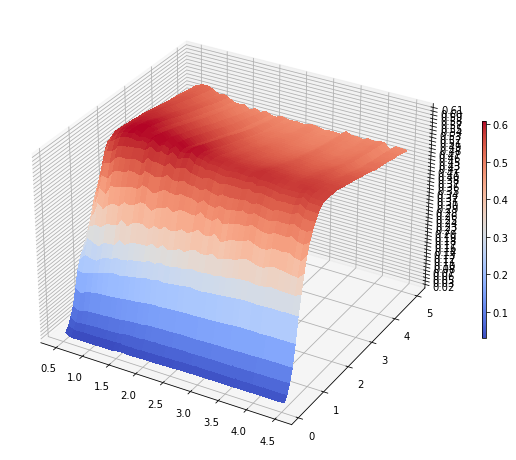

In [16]:
plot_df(df_ssim_paired)